<a href="https://colab.research.google.com/github/kaveku/NLP/blob/main/Pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Make sure to Install Pytorch

In [3]:
import torch
import numpy as np

In [4]:
x = torch.rand(3)
print(x)

tensor([0.0384, 0.5470, 0.4685])


In [5]:
#Check if cuda is available
torch.cuda.is_available()


False

In [6]:
#Empty tensor of size 1
x = torch.rand(3)
print(x)

tensor([0.4401, 0.2270, 0.5002])


In [7]:
x = torch.ones(2,2, dtype = torch.float16)
print(x)
print(x.size())

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
torch.Size([2, 2])


In [8]:
x = torch.tensor([2.5, 0.1])
print(x)

tensor([2.5000, 0.1000])


In [9]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

print(x+y)

z = torch.add(x, y)
print(z)

y.add(x)
print(y)

tensor([[1.2711, 1.4265],
        [1.6746, 1.2201]])
tensor([[1.2711, 1.4265],
        [1.6746, 1.2201]])
tensor([[0.5852, 0.4346],
        [0.7696, 0.2303]])


In [10]:
z = x -y
z = torch.sub(x, y)
print(z)

z = torch.div(x, y)
z = torch.mul(x, y)
print(z)

tensor([[0.1007, 0.5573],
        [0.1353, 0.7595]])
tensor([[0.4014, 0.4311],
        [0.6965, 0.2279]])


In [11]:
x = torch.rand(5, 3)
print(x[0, :])

tensor([0.5522, 0.5398, 0.4645])


In [12]:
print(x[1, :])

tensor([0.6008, 0.5088, 0.9080])


In [13]:
print(x[1, 1].item())

0.5088439583778381


In [14]:
#reshaping a tensor
x = torch.rand(4, 4)
print(x)
y = x.view(16)
m = x.view(-1, 8)
print(y)
print(m)

tensor([[0.6672, 0.0753, 0.8043, 0.7157],
        [0.7632, 0.8786, 0.4898, 0.1246],
        [0.6365, 0.4254, 0.0764, 0.1274],
        [0.0815, 0.5802, 0.8375, 0.2228]])
tensor([0.6672, 0.0753, 0.8043, 0.7157, 0.7632, 0.8786, 0.4898, 0.1246, 0.6365,
        0.4254, 0.0764, 0.1274, 0.0815, 0.5802, 0.8375, 0.2228])
tensor([[0.6672, 0.0753, 0.8043, 0.7157, 0.7632, 0.8786, 0.4898, 0.1246],
        [0.6365, 0.4254, 0.0764, 0.1274, 0.0815, 0.5802, 0.8375, 0.2228]])


In [15]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [16]:
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [17]:
a.add(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [18]:
#Convert from numpy to tensor
c = torch.from_numpy(b)
print(c)

tensor([1., 1., 1., 1., 1.])


In [19]:
#To perform the operations on the GPU
#Check if Cuda is available
if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5, device = device)
  y = torch.ones(5)
  y = y.to(device) #will move to device
  z = x +y
  #z.numpy.   #Will give an error. Gpu only works with tensors, move z to cpu first, then conver to numpy array
  z = z.to("cpu")
  print(z)


In [20]:
x = torch.ones(5, requires_grad = True) #This tells pytorch that it will need to calculate gradients for this tensor later in the course
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [21]:
#Autograd in Pytorch
x = torch.randn(3, requires_grad = True) #Will need to compute gradient of something with respect to x
print(x)

tensor([-2.6137, -0.7140, -0.0243], requires_grad=True)


y = x + 2 # creates a computational graph 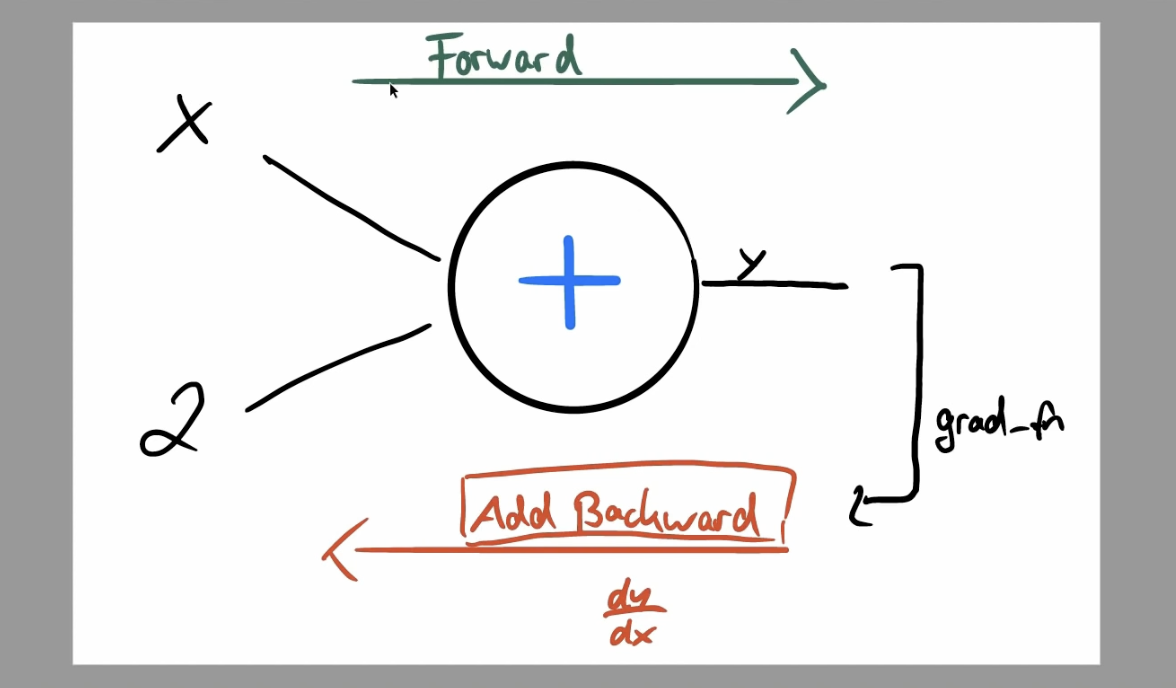

In [22]:
print(x)

tensor([-2.6137, -0.7140, -0.0243], requires_grad=True)


In [23]:
y = x + 2 # creates a computational graph

In [24]:
print(y)

tensor([-0.6137,  1.2860,  1.9757], grad_fn=<AddBackward0>)


In [25]:
#To remove requires grad, set it to false, or detach
  # y = x .detach()
  # print(y)

In [26]:
z = y*y*2
print(z)
#z = z.mean()
print(z)

tensor([0.7532, 3.3074, 7.8066], grad_fn=<MulBackward0>)
tensor([0.7532, 3.3074, 7.8066], grad_fn=<MulBackward0>)


In [27]:
# Y points to a gradient function Add Backward, that computes the gradient of y with respect to x

In [28]:
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32) #This is when there is no mean value calculated. We need a vector to make sure the tensors are of the same size
z.backward(v)
print(x.grad)

tensor([-0.2455,  5.1439,  0.0079])


In [29]:
#z.backward()  #dz/dx
#print(x.grad)

In [30]:
#Prevent pytorch from getting the history of calculating the gradients

x = torch.rand(3, requires_grad = True)
print(x)

#x.requires_grad(False)
#x.detach()
#with torch.no_grad():

with torch.no_grad():
  y = x+2
  print(y)

tensor([0.7700, 0.1414, 0.6305], requires_grad=True)
tensor([2.7700, 2.1414, 2.6305])


In [31]:
#Some dummy training example

weights = torch.ones(4, requires_grad = True)

for epoch in range(1):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])


In [32]:
#The gradients keep accumulating for every epoch
for epoch in range(4):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])


In [33]:
#The best way to solve this is by zeroing the gradients 

In [34]:
for epoch in range(5):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_() #Now gradients do not accumulate

tensor([18., 18., 18., 18.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [35]:
# #Working with pytorch build with Optimizers
# weights = torch.ones(4, dtype = torch.float16, requires_grad=True)

# optimizer = torch.optim.SGD(weights, lr = 0.01)
# optimizer.step()
# optimizer.zero_grad()

#CHECK WHY ABOVE CODE DOESN'T WORK

Chain Rule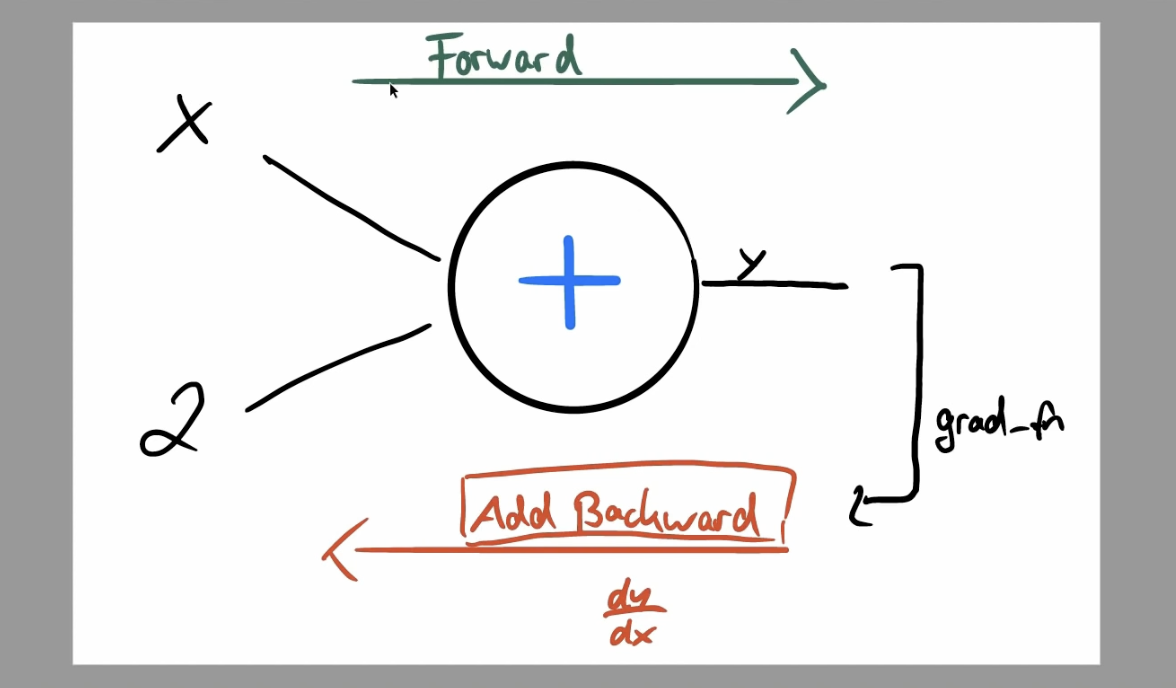

In [36]:
#The chain rule


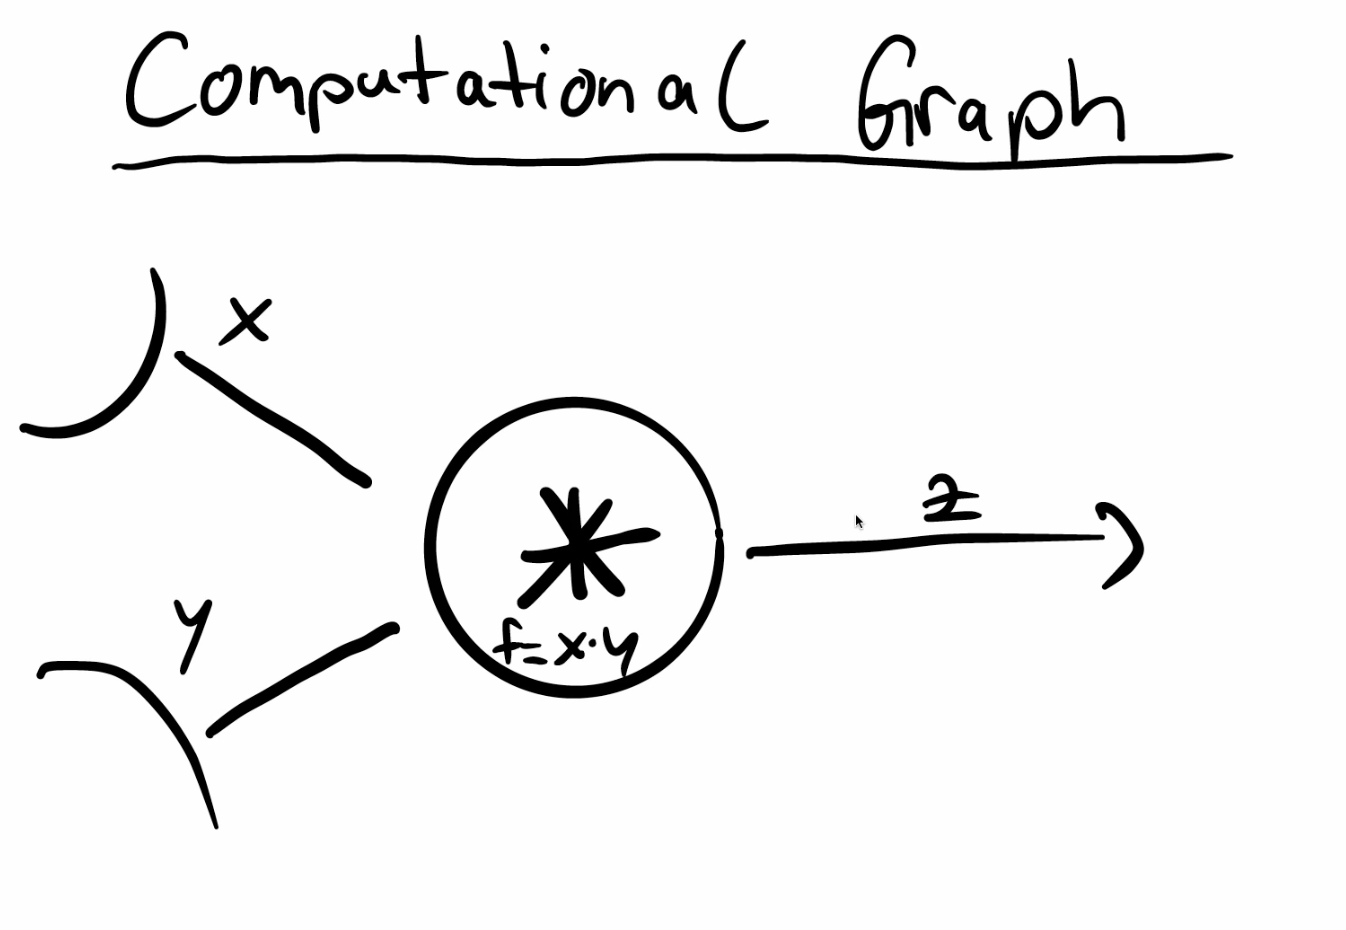

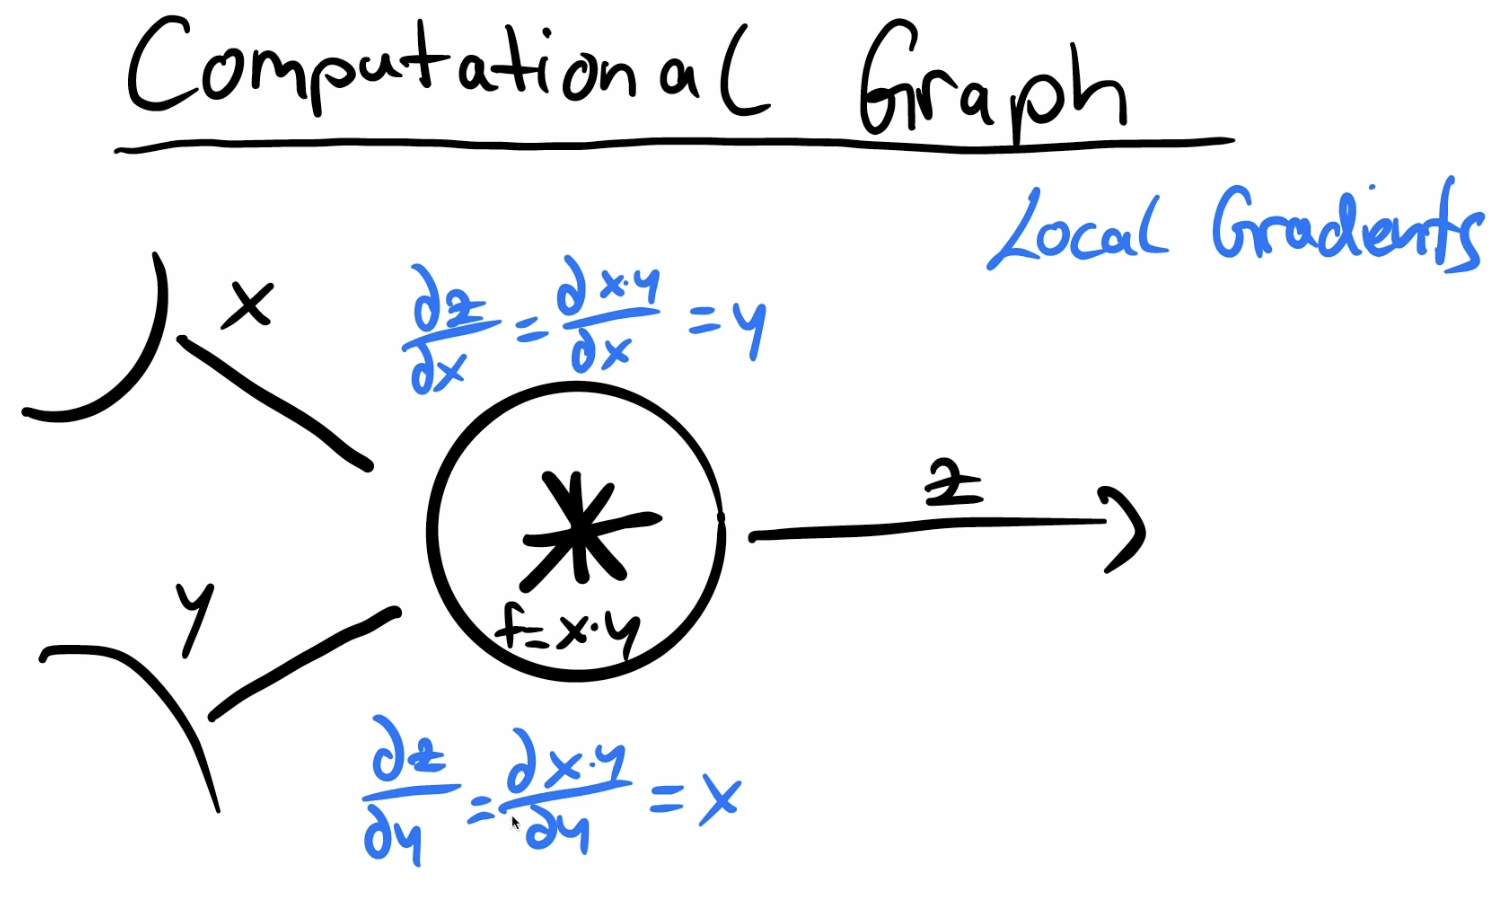

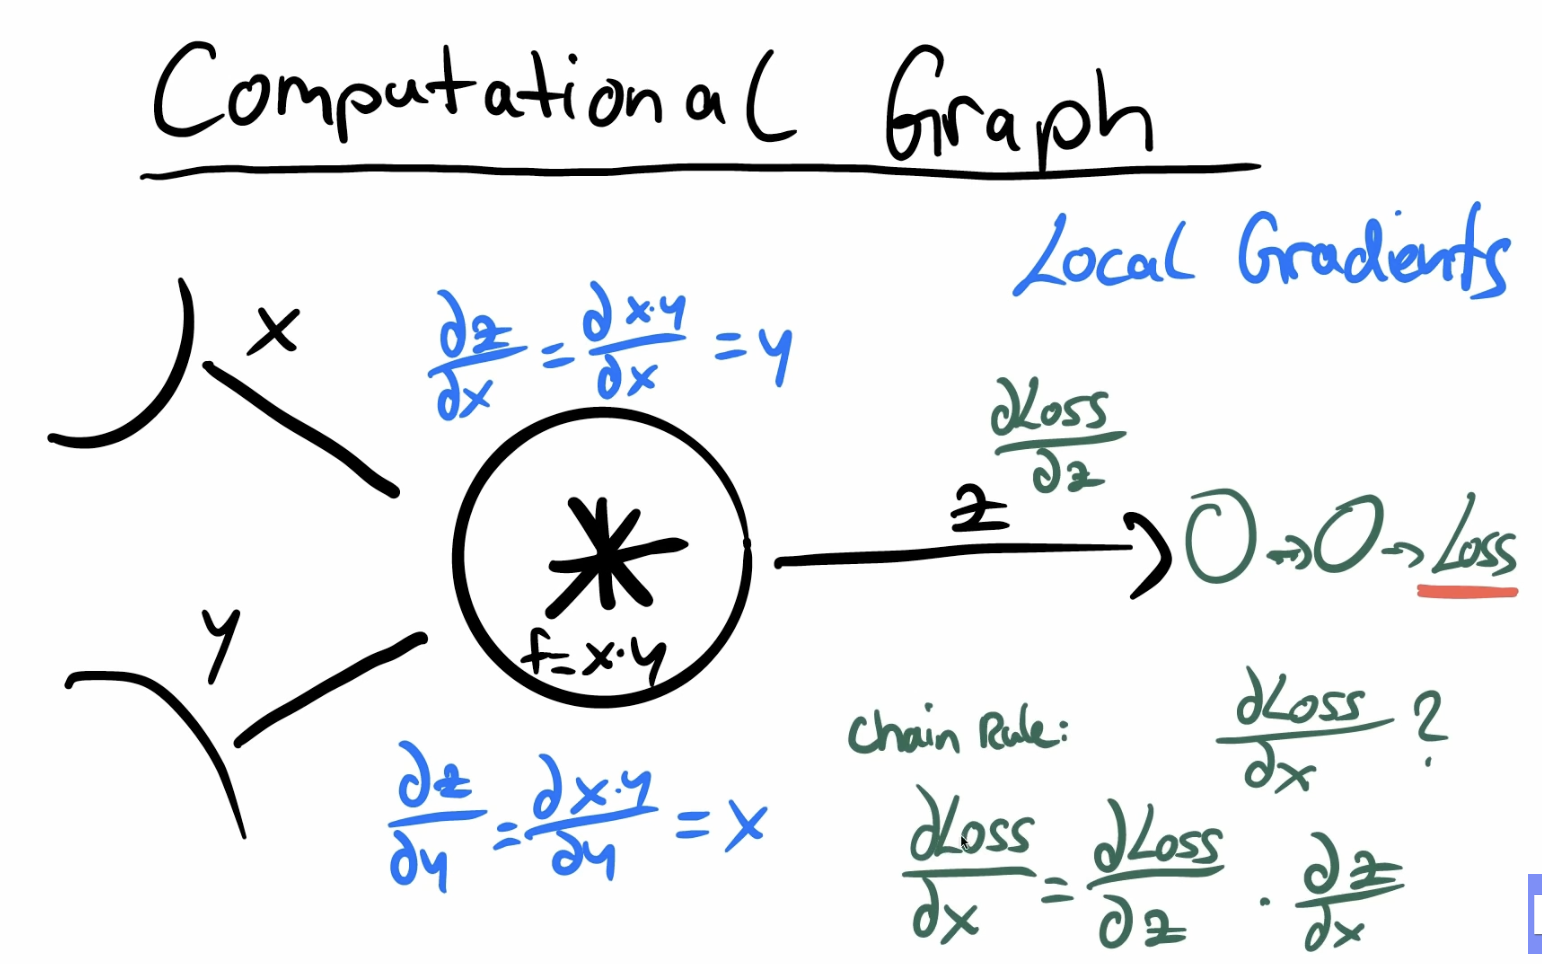

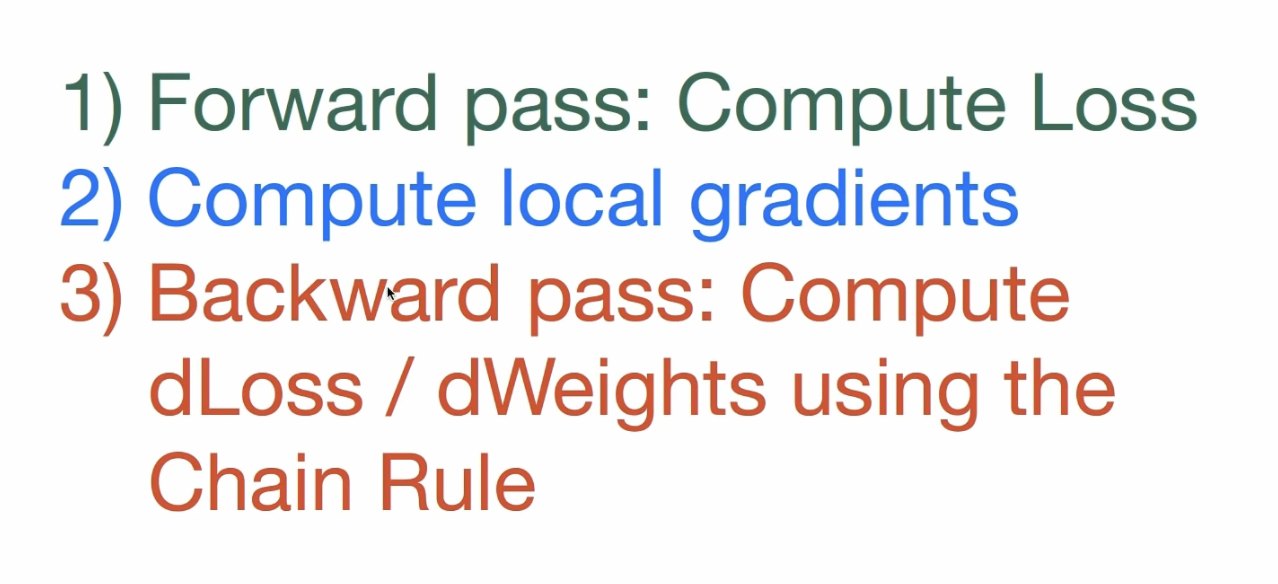

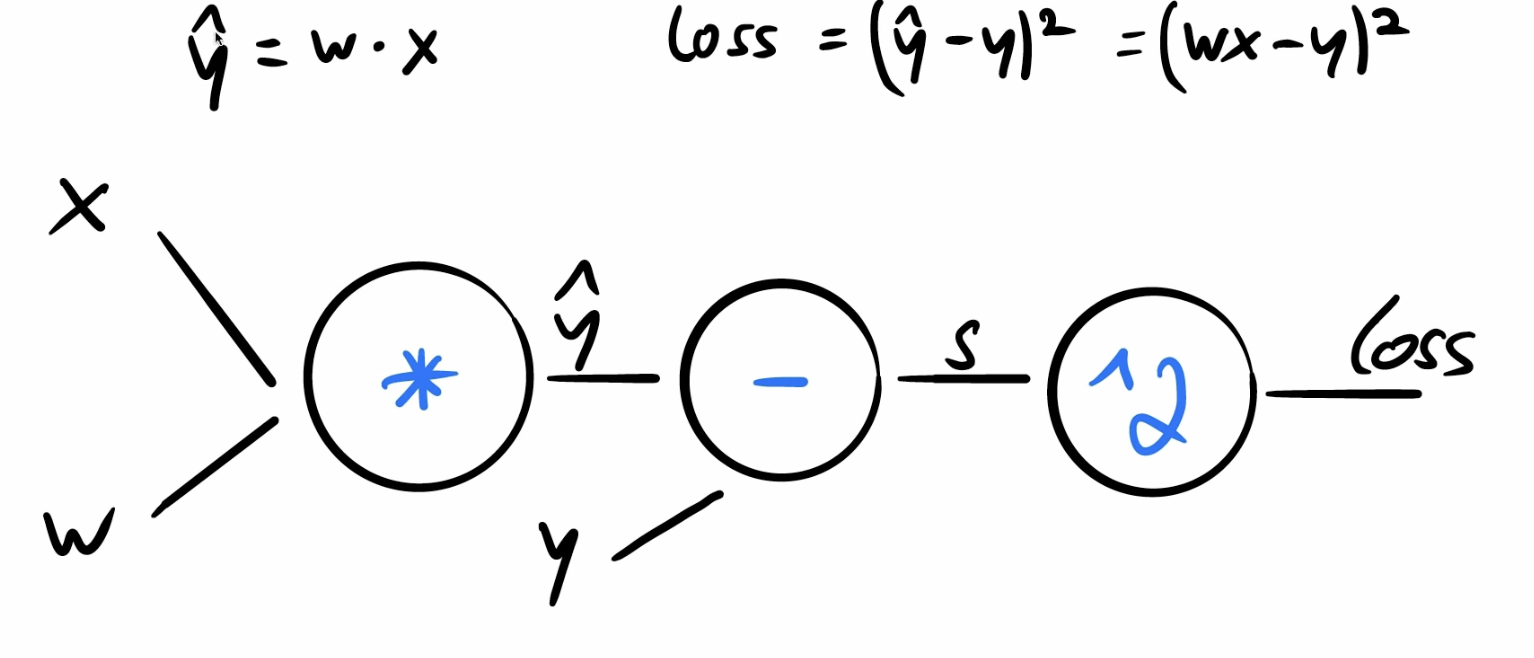

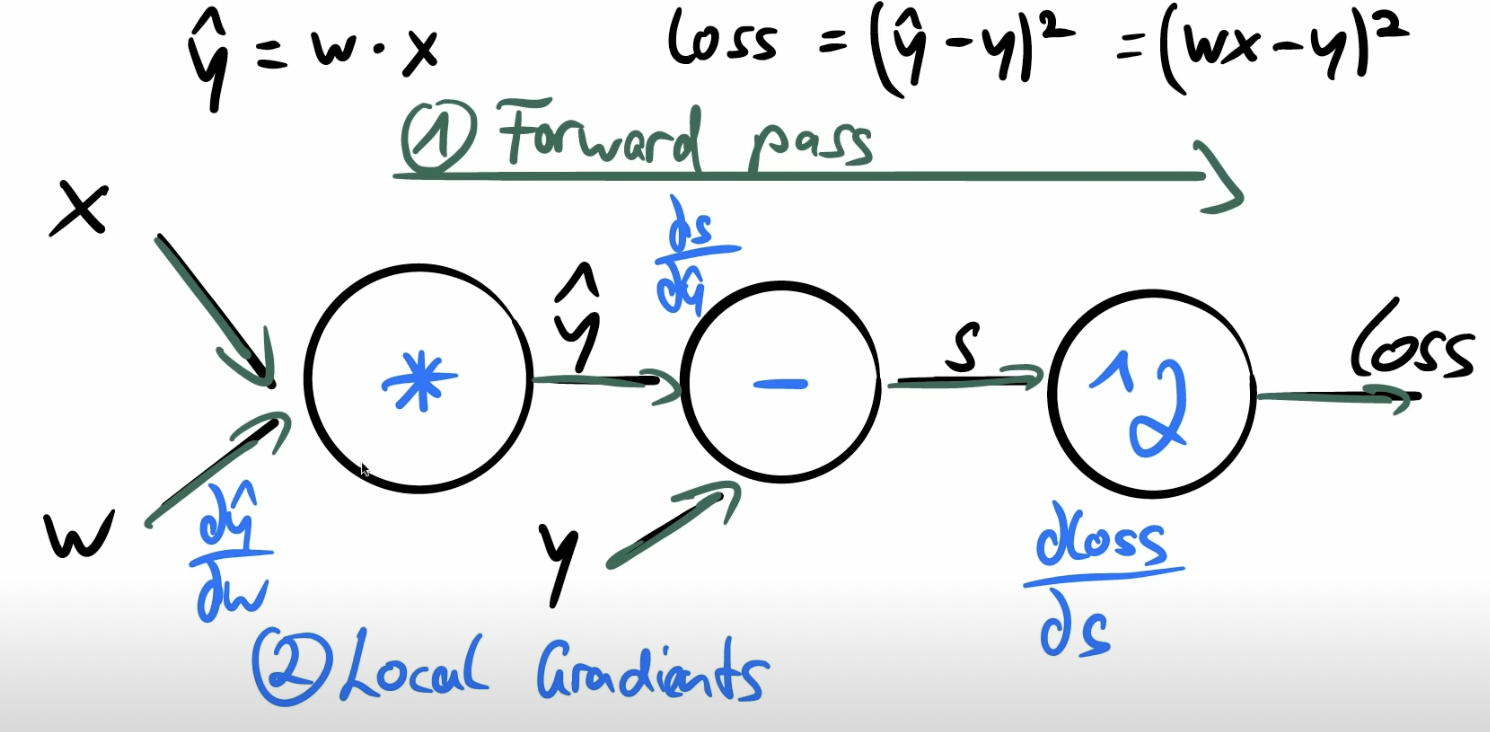

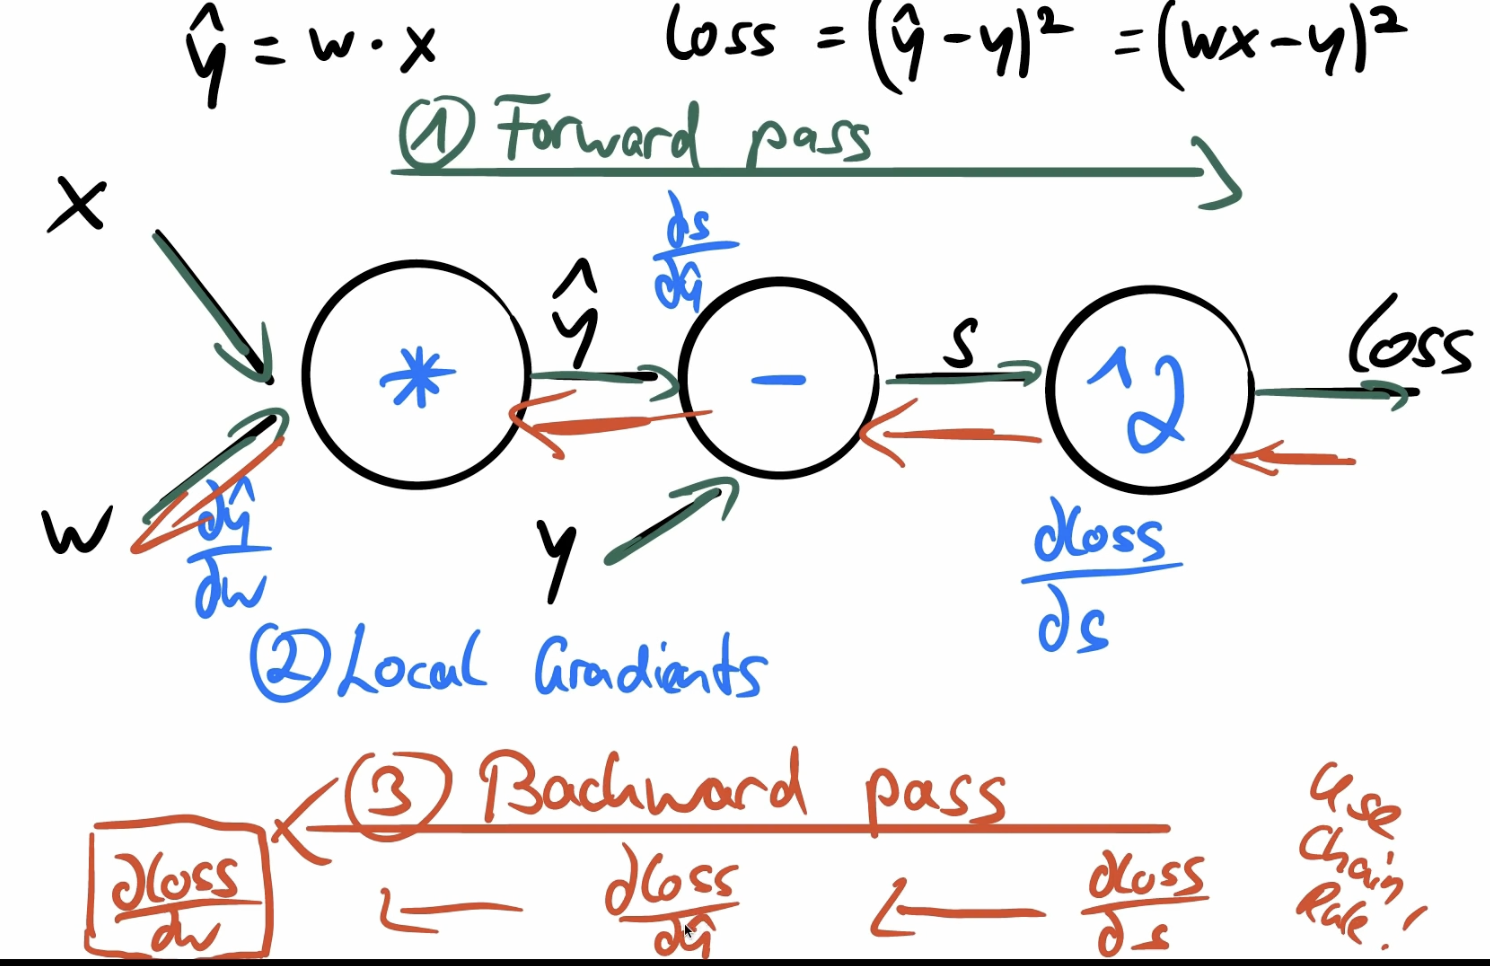

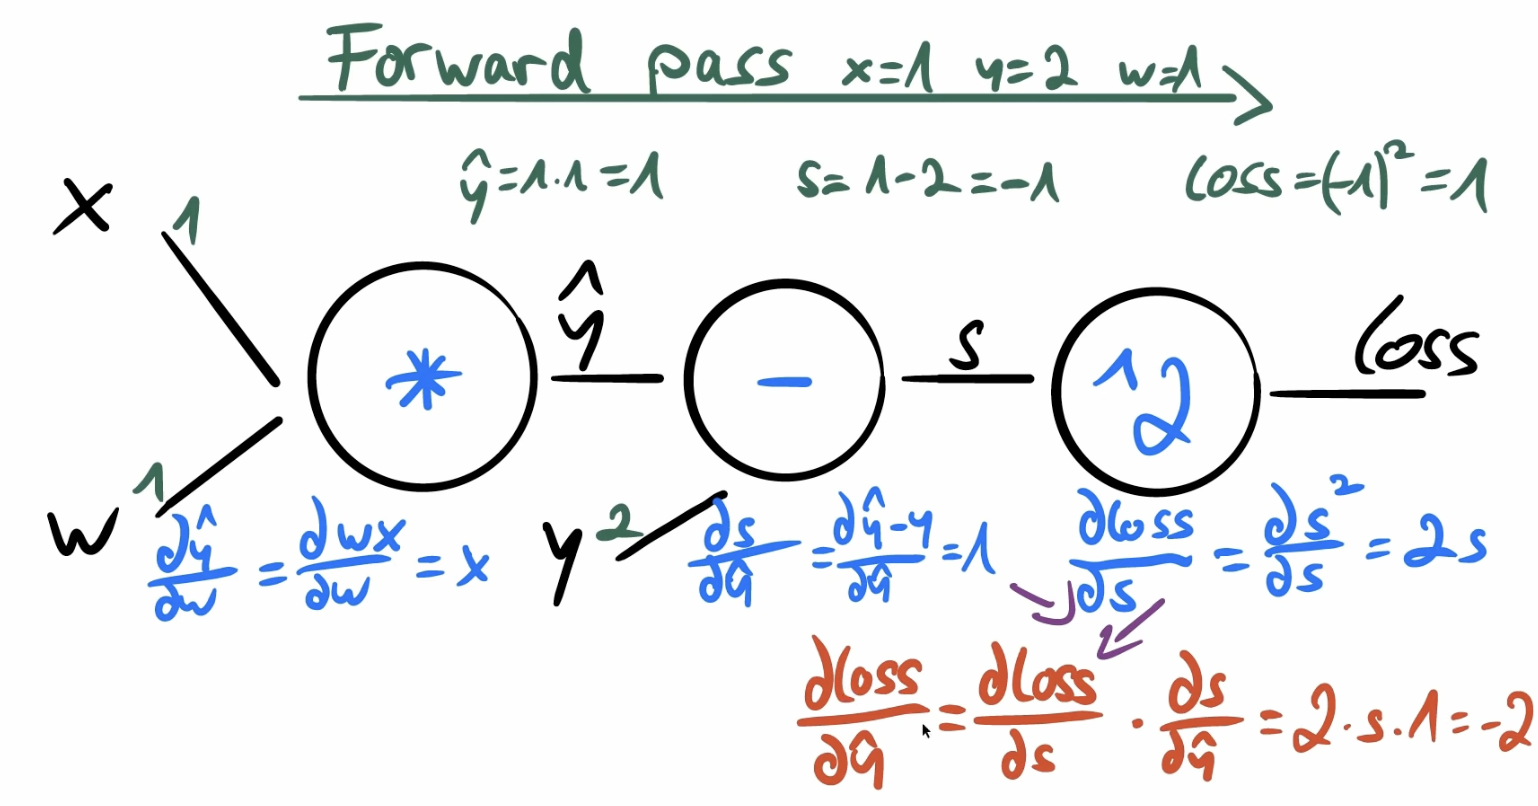

In [37]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)

#Forward pass
y_hat = w*x
loss =(y_hat - y)** 2

print(loss)

#Backward pass.    # Done automatically
loss.backward()
print(w.grad)        #1st gradient after the first froward and backward pass

###Update weights
###Do the next forward and backward pass, and for the next iterations


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [43]:
#Linear regression from scratch
# f = w + x # A linear combination of some weights

X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.0

#Model prediction
def forward(x):
  return w * x

def loss(y, y_predicted):
  return ((y_predicted -y)**2).mean()

# gardient
#MSE = 1/n * (wx -y)**2
#dJ/dw = 1/N 2x (w*x -y)
def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients
  dw = gradient(X, Y, y_pred)

  #update weights
  w -= learning_rate * dw #we go into the negative direction of the training of the gradient

  if epoch %1 ==0:
    print(f'epoch{epoch+1}: w ={w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')



Prediction before training: f(5) = 0.000
epoch1: w =1.200, loss = 30.00000000
epoch2: w =1.680, loss = 4.79999924
epoch3: w =1.872, loss = 0.76800019
epoch4: w =1.949, loss = 0.12288000
epoch5: w =1.980, loss = 0.01966083
epoch6: w =1.992, loss = 0.00314574
epoch7: w =1.997, loss = 0.00050331
epoch8: w =1.999, loss = 0.00008053
epoch9: w =1.999, loss = 0.00001288
epoch10: w =2.000, loss = 0.00000206
Prediction after training: f(5) = 9.999


In [49]:
#Now doing everything with pytorch

#Linear regression
# f = w * x # A linear combination of some weights

X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#Model prediction
def forward(x):
  return w * x

def loss(y, y_predicted):
  return ((y_predicted -y)**2).mean()

# gardient
#MSE = 1/n * (wx -y)**2
#dJ/dw = 1/N 2x (w*x -y)

# def gradient(x, y, y_predicted):
#   return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients = Backward pass
  l.backward() #dl/dw

  #update weights
  #Not part of the computaional graph, hence:
  with torch.no_grad():
    w -= learning_rate * w.grad #we go into the negative direction of the training of the gradient

  #Zero the gradients, so they dont accumulate in the w.grad attribute
  w.grad.zero_()

  if epoch %10 ==0:
    print(f'epoch{epoch+1}: w ={w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')




Prediction before training: f(5) = 0.000
epoch1: w =0.300, loss = 30.00000000
epoch11: w =1.665, loss = 1.16278565
epoch21: w =1.934, loss = 0.04506890
epoch31: w =1.987, loss = 0.00174685
epoch41: w =1.997, loss = 0.00006770
epoch51: w =1.999, loss = 0.00000262
epoch61: w =2.000, loss = 0.00000010
epoch71: w =2.000, loss = 0.00000000
epoch81: w =2.000, loss = 0.00000000
epoch91: w =2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [54]:
#Replacing manually computed loss and parameters with pytorch
#General training pipeline in Pytorcg

#1. Design mdel (input, output size, forward pass)
#2. Design loss and optimizer
#3. Training loop
#.  - forward pass: compute prediction
#.  - backward pass: gradients
#.  - update weights
import torch

#Importing the neural network module
import torch.nn as nn

#Now doing everything with pytorch

#Linear regression
# f = w * x # A linear combination of some weights

X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

#Sample test_sample
X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#Model prediction
# def forward(x):
#   return w * x
#Replace manual forward with Pytorch module, we also dont need w anymore, pytorch module knows the parameters
model = nn.Linear(input_size, output_size)  #one layer already provided in Pytorch, also, change X and Y into 2d arrays
# def loss(y, y_predicted):
#   return ((y_predicted -y)**2).mean()

# gardient
#MSE = 1/n * (wx -y)**2
#dJ/dw = 1/N 2x (w*x -y)

# def gradient(x, y, y_predicted):
#   return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

#Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients = Backward pass
  l.backward() #dl/dw

  #update weights
  #Not part of the computaional graph, hence:
  # with torch.no_grad():
  #   w -= learning_rate * w.grad #we go into the negative direction of the training of the gradient
  #No need to update weights manually anymore
  optimizer.step()

  #Zero the gradients, so they dont accumulate in the w.grad attribute
  #w.grad.zero_()
  optimizer.zero_grad()

  if epoch %10 ==0:
    [w, b]= model.parameters() #To unpack them
    print(f'epoch{epoch+1}: w ={w[0][0]:.3f}, loss = {l:.8f}')   #Call the item

print(f'Prediction after training: f(5) = {forward(X_test).item():.3f}')


4 1
Prediction before training: f(5) = -0.830
epoch1: w =0.021, loss = 0.00000000
epoch11: w =1.610, loss = 1.57588494
epoch21: w =1.923, loss = 0.06108042
epoch31: w =1.985, loss = 0.00236745
epoch41: w =1.997, loss = 0.00009176
epoch51: w =1.999, loss = 0.00000356
epoch61: w =2.000, loss = 0.00000014
epoch71: w =2.000, loss = 0.00000001
epoch81: w =2.000, loss = 0.00000000
epoch91: w =2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [53]:
#Adding a custom linear regression module
#Replacing manually computed loss and parameters with pytorch
#General training pipeline in Pytorcg

#1. Design mdel (input, output size, forward pass)
#2. Design loss and optimizer
#3. Training loop
#.  - forward pass: compute prediction
#.  - backward pass: gradients
#.  - update weights
import torch

#Importing the neural network module
import torch.nn as nn

#Now doing everything with pytorch

#Linear regression
# f = w * x # A linear combination of some weights

X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

#Sample test_sample
X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#Model prediction
# def forward(x):
#   return w * x
#Replace manual forward with Pytorch module, we also dont need w anymore, pytorch module knows the parameters
#model = nn.Linear(input_size, output_size)  #one layer already provided in Pytorch, also, change X and Y into 2d arrays
# def loss(y, y_predicted):
#   return ((y_predicted -y)**2).mean()

# gardient
#MSE = 1/n * (wx -y)**2
#dJ/dw = 1/N 2x (w*x -y)

# def gradient(x, y, y_predicted):
#   return np.dot(2*x, y_predicted-y).mean()

#Adidng a custom linear regression module
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    #Define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)


print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

#Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients = Backward pass
  l.backward() #dl/dw

  #update weights
  #Not part of the computaional graph, hence:
  # with torch.no_grad():
  #   w -= learning_rate * w.grad #we go into the negative direction of the training of the gradient
  #No need to update weights manually anymore
  optimizer.step()

  #Zero the gradients, so they dont accumulate in the w.grad attribute
  #w.grad.zero_()
  optimizer.zero_grad()

  if epoch %10 ==0:
    [w, b]= model.parameters() #To unpack them
    print(f'epoch{epoch+1}: w ={w[0][0]:.3f}, loss = {l:.8f}')   #Call the item

print(f'Prediction after training: f(5) = {forward(X_test).item():.3f}')


4 1
Prediction before training: f(5) = 9.691
epoch1: w =2.000, loss = 0.00000000
epoch11: w =2.000, loss = 0.00000000
epoch21: w =2.000, loss = 0.00000000
epoch31: w =2.000, loss = 0.00000000
epoch41: w =2.000, loss = 0.00000000
epoch51: w =2.000, loss = 0.00000000
epoch61: w =2.000, loss = 0.00000000
epoch71: w =2.000, loss = 0.00000000
epoch81: w =2.000, loss = 0.00000000
epoch91: w =2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [55]:
#Implementing Linear regression, applying all the learned concepts
#1. Design mdel (input, output size, forward pass)
#2. Design loss and optimizer
#3. Training loop
#.  - forward pass: compute prediction
#.  - backward pass: gradients
#.  - update weights

epoch: 10, loss = 4458.4473
epoch: 20, loss = 3326.8936
epoch: 30, loss = 2507.5007
epoch: 40, loss = 1913.5551
epoch: 50, loss = 1482.6257
epoch: 60, loss = 1169.7017
epoch: 70, loss = 942.2877
epoch: 80, loss = 776.8965
epoch: 90, loss = 656.5317
epoch: 100, loss = 568.8811


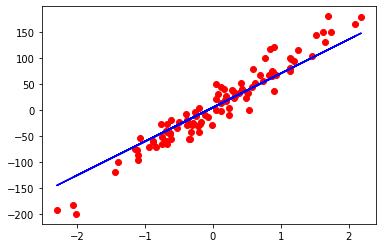

In [67]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#0. Preparing data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features =1, noise = 20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)#Reshape Y, because it only has 1 row, and we need to reshape into a column vector

n_samples, n_features = x.shape

#1. Design model (input, output size, forward pass)
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

#2. Design loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#3. Training loop
num_epochs = 100
for epoch in range(num_epochs):
  #.  - forward pass: compute prediction
  y_predicted = model(x)
  loss = criterion(y_predicted, y)

  #.  - backward pass: gradients
  loss.backward()

  #.  - update weights
  optimizer.step()

  optimizer.zero_grad()

  if(epoch+1)%10 ==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

#plot
predicted = model(x).detach().numpy()
#print(predicted)
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

LOGISTIC REGRESSION

In [82]:
#Implementing Logistic regression, applying all the learned concepts

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#0. Prepare data
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_samples, n_features = x.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

#Scale feature
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#reshape y tensor
y_train = y_train.view(y_train.shape[0], 1)  #Placing each value in 1 row, and only one column
y_test = y_test.view(y_test.shape[0], 1)

#1. Design model (input, output size, forward pass)
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)


#2. Design loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#3. Training loop
num_epoch = 100
for epoch in range(num_epoch):
  #.  - forward pass: compute prediction
  y_predicted = model(x_train)
  loss = criterion(y_predicted, y_train)
  #.  - backward pass: gradients
  loss.backward

  #.  - update weights
  optimizer.step()

  #Zero gradients
  optimizer.zero_grad()

  if (epoch+1) %10 ==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(x_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum()/ float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.8393
epoch: 20, loss = 0.8393
epoch: 30, loss = 0.8393
epoch: 40, loss = 0.8393
epoch: 50, loss = 0.8393
epoch: 60, loss = 0.8393
epoch: 70, loss = 0.8393
epoch: 80, loss = 0.8393
epoch: 90, loss = 0.8393
epoch: 100, loss = 0.8393
accuracy = 0.4123


In [ ]:
#Pytorch dataset and datloader classes
